In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [45]:

def get_auc(test_question):
    label_encoder = LabelEncoder()
    test_question['label_encoded'] = label_encoder.fit_transform(test_question['label'])
    test_question['random_answer_encoded'] = label_encoder.transform(test_question['random_answer'])
    auc_score = roc_auc_score(test_question['label_encoded'], test_question['random_answer_encoded'])
    return auc_score


In [8]:
TEST_QUESTION_PATH = "../../../data/benchmark_datasets/test_questions.csv"

N_SAMPLES = 1000


In [12]:
test_question = pd.read_csv(TEST_QUESTION_PATH)
total_questions = test_question.shape[0]


In [43]:
auc_list = []
for i in range(N_SAMPLES):
    random_arr = np.random.choice([True, False], size=total_questions)
    test_question.loc[:, "random_answer"] = random_arr
    auc_list.append(get_auc(test_question))

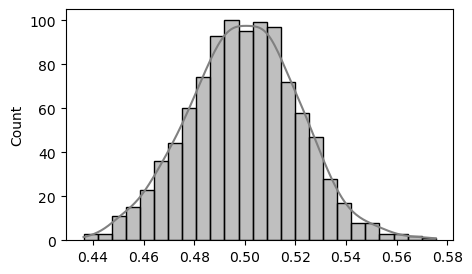

In [44]:
plt.figure(figsize=(5, 3))
custom_palette = ["gray"]
sns.histplot(auc_list, color='gray', kde=True)


plt.show()


In [38]:
test_question

,text,label,random_answer,label_encoded,random_answer_encoded
0,enhanced S-cone syndrome is not a vitreoretina...,False,True,0,1
1,metronidazole treats crohn's disease,True,True,1,1
2,KLEEFSTRA SYNDROME 1 is not associated with Ge...,False,True,0,1
3,STARGARDT DISEASE 1 (disorder) is not associat...,False,True,0,1
4,Juvenile polyposis syndrome associates Gene SMAD4,True,True,1,1
...,...,...,...,...,...
604,alpha-mannosidosis is a eye disorder,True,True,1,1
605,Juvenile polyposis syndrome associates Gene BM...,True,False,1,0
606,"Diabetes Mellitus, Non-Insulin-Dependent is no...",False,False,0,0
607,Menkes Kinky Hair Syndrome associates Gene ATP7A,True,True,1,1
